## HistGradientBoosting

Jest to implementacja gradient boosting, która korzysta z histogramów do przyspieszenia procesu trenowania, co czyni go wydajnym narzędziem do dużych zbiorów danych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor

dane = pd.read_csv('../DataIn/004_mieszkania_600.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna

model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_bins=255, random_state=42)
model.fit(X, y)

HistGradientBoostingRegressor(random_state=42)

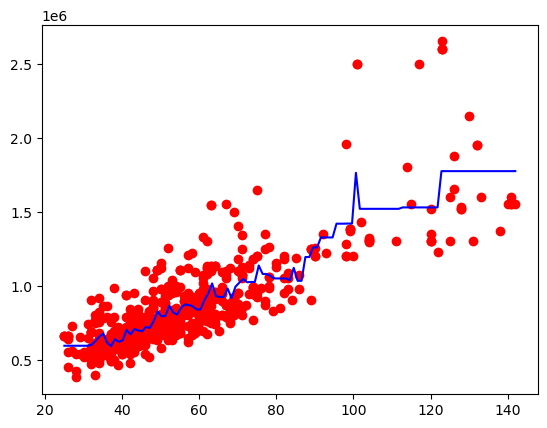

In [2]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = max(X)-min(X))
X_in = np.linspace(np.min(X), np.max(X), (np.max(X)-np.min(X))) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej
prognoza = model.predict(X_in) 

plt.scatter(X, y, color='red') 
plt.plot(X_in, prognoza, color='blue') 
plt.show()

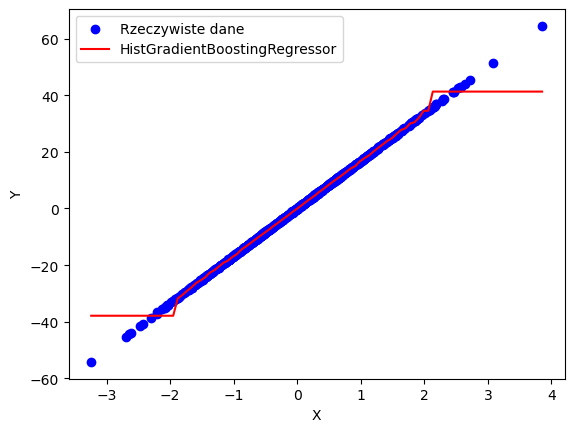

In [3]:
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generowanie przykładowych danych
X, Y = make_regression(n_samples=1000, n_features=1, noise=0.1, random_state=42)

# Tworzenie modelu HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_bins=255, random_state=42)
model.fit(X, Y)

# Przewidywanie
X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)
Y_pred = model.predict(X_test)

# Rysowanie wykresu
plt.scatter(X, Y, color='blue', label='Rzeczywiste dane')
plt.plot(X_test, Y_pred, color='red', label='HistGradientBoostingRegressor')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
